### Samuel Alejandro Díaz del Guante Ochoa - A01637592
# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The cartwheel dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan


<font size='6' color='blue'>Activity: work with iris dataset</font>

Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.

In [1]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [2]:
# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [3]:
print(dataset.shape)

dataset.head()


(150, 5)


,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values

In [4]:
dataset = dataset.dropna()

print(dataset.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num


In [5]:
# Encoding the categorical column
dataset = dataset.replace({"Class":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

# Note: this is not neesary for the cartwheel dataset, but it going to be very usefull for the Iris dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


4. Discard columns that won't be used


In [6]:
# Drop out non necesary columns
dataset.drop(['SepalWidth','SepalLength'],axis='columns',inplace=True)

#Visualize the dataset
dataset


,PetalLength,PetalWidth,Class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


5. Scatter plot of the data

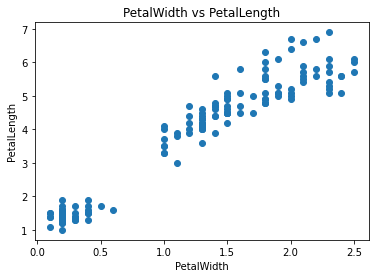

In [7]:
plt.scatter(dataset.PetalWidth,dataset.PetalLength)
plt.title('PetalWidth vs PetalLength')
plt.xlabel('PetalWidth')
plt.ylabel('PetalLength')
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

<ipython-input-8-66b7221dcc38>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.PetalWidth, df1.PetalLength, Label='Iris Setosa')
<ipython-input-8-66b7221dcc38>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.PetalWidth, df2.PetalLength, Label='Iris Versicolour')
<ipython-input-8-66b7221dcc38>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.PetalWidth, df3.PetalLength, Label='Iris Virginica')


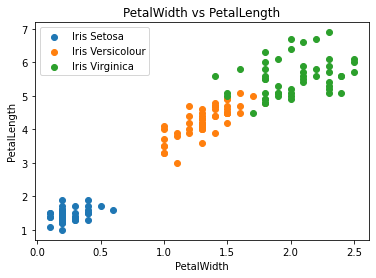

In [8]:
df1 = dataset[dataset.Class==0]
df2 = dataset[dataset.Class==1]
df3 = dataset[dataset.Class==2]

plt.scatter(df1.PetalWidth, df1.PetalLength, Label='Iris Setosa')
plt.scatter(df2.PetalWidth, df2.PetalLength, Label='Iris Versicolour')
plt.scatter(df3.PetalWidth, df3.PetalLength, Label='Iris Virginica')

plt.title('PetalWidth vs PetalLength')
plt.xlabel('PetalWidth')
plt.ylabel('PetalLength')
plt.legend()
plt.show()

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [9]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(dataset[['PetalWidth','PetalLength']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = yp

# Visualize the dataset
dataset

,PetalLength,PetalWidth,Class,Cluster1
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1
...,...,...,...,...
145,5.2,2.3,2,0
146,5.0,1.9,2,0
147,5.2,2.0,2,0
148,5.4,2.3,2,0


In [11]:
# Visualize the ID of the clusters
dataset.Cluster1.unique()

array([1, 2, 0])

In [12]:
# Center of each cluster
km.cluster_centers_

array([[2.0375    , 5.59583333],
       [0.246     , 1.462     ],
       [1.34230769, 4.26923077]])

In [13]:
# Sum of squared error
km.inertia_

31.371358974358966

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

<ipython-input-14-fb61f90c0be8>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.PetalWidth, df1.PetalLength, Label='Iris Setosa')
<ipython-input-14-fb61f90c0be8>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.PetalWidth, df2.PetalLength, Label='Iris Versicolour')
<ipython-input-14-fb61f90c0be8>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.PetalWidth, df3.PetalLength, Label='Iris Virginica')


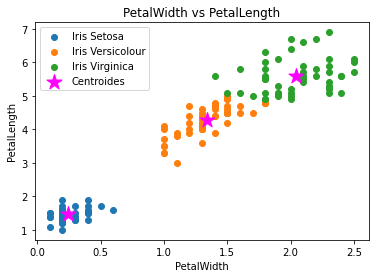

In [14]:
df1 = dataset[dataset.Cluster1==1]
df2 = dataset[dataset.Cluster1==2]
df3 = dataset[dataset.Cluster1==0]

plt.scatter(df1.PetalWidth, df1.PetalLength, Label='Iris Setosa')
plt.scatter(df2.PetalWidth, df2.PetalLength, Label='Iris Versicolour')
plt.scatter(df3.PetalWidth, df3.PetalLength, Label='Iris Virginica')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('PetalWidth vs PetalLength')
plt.xlabel('PetalWidth')
plt.ylabel('PetalLength')
plt.legend()
plt.show()

Plot real clusters and visual comparison

<ipython-input-15-66b7221dcc38>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.PetalWidth, df1.PetalLength, Label='Iris Setosa')
<ipython-input-15-66b7221dcc38>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.PetalWidth, df2.PetalLength, Label='Iris Versicolour')
<ipython-input-15-66b7221dcc38>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.PetalWidth, df3.PetalLength, Label='Iris Virginica')


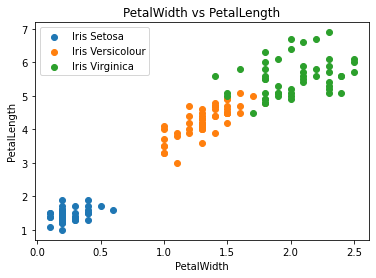

In [15]:
df1 = dataset[dataset.Class==0]
df2 = dataset[dataset.Class==1]
df3 = dataset[dataset.Class==2]

plt.scatter(df1.PetalWidth, df1.PetalLength, Label='Iris Setosa')
plt.scatter(df2.PetalWidth, df2.PetalLength, Label='Iris Versicolour')
plt.scatter(df3.PetalWidth, df3.PetalLength, Label='Iris Virginica')

plt.title('PetalWidth vs PetalLength')
plt.xlabel('PetalWidth')
plt.ylabel('PetalLength')
plt.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [16]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['PetalWidth','PetalLength']])
    sse.append(km.inertia_)

C:\Users\samue\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


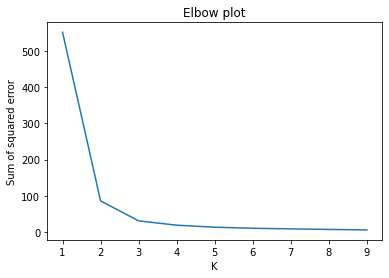

In [17]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means